![zad5](img/zad4.png)

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Задание 4

x = lambda y0: np.log(y0)/y0
y = lambda x0: np.sqrt(4 - x0**2)
y2 = lambda x0: -np.sqrt(4 - x0**2)
e = 10**-4

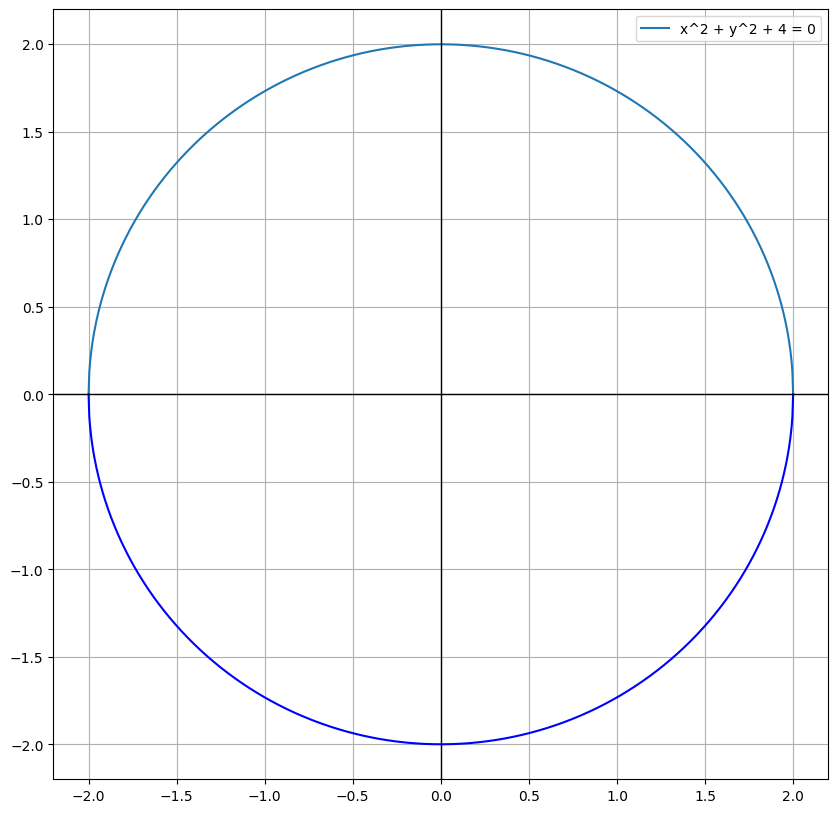

In [3]:
def draw_x(ax):
    x_range = np.linspace(-2 + 10**-12, 2 - 10**-12, 1000)

    y_range = y(x_range)
    y2_range = y2(x_range)

    ax.plot(x_range, y_range, label='x^2 + y^2 + 4 = 0')
    ax.plot(x_range, y2_range, color='blue')
    
    ax.axhline(0, color='black', linewidth=1, linestyle='-')
    ax.axvline(0, color='black', linewidth=1, linestyle='-')
    ax.grid()
    ax.legend()

fig, ax = plt.subplots(figsize=(10, 10))
draw_x(ax)

C:\Users\Самыел\AppData\Local\Temp\ipykernel_15980\1480509029.py:3: RuntimeWarning: divide by zero encountered in log
  x = lambda y0: np.log(y0)/y0


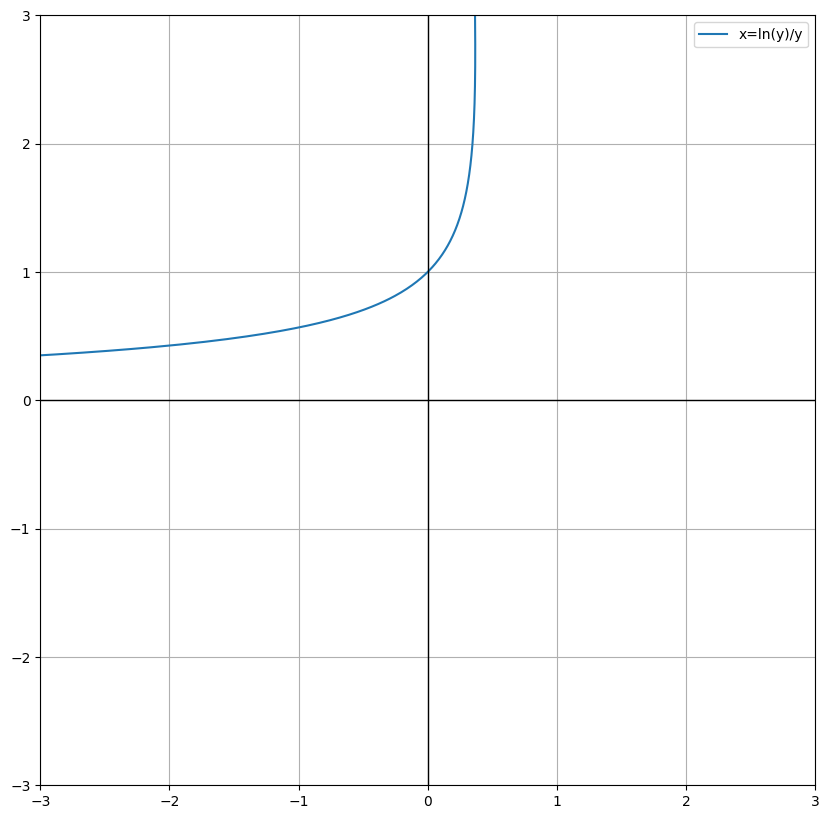

In [4]:
def draw_y(ax):
    y_values = np.linspace(0, 7, 1000)  # y > 0
    x_values = x(y_values)

    ax.plot(x_values, y_values, label='x=ln(y)/y')


fig, ax = plt.subplots(figsize=(10, 10))
draw_y(ax)
ax.axhline(0, color='black', linewidth=1, linestyle='-')
ax.axvline(0, color='black', linewidth=1, linestyle='-')
ax.set_ylim((-3, 3))
ax.set_xlim((-3, 3))
ax.legend()
ax.grid()

C:\Users\Самыел\AppData\Local\Temp\ipykernel_15980\1480509029.py:3: RuntimeWarning: divide by zero encountered in log
  x = lambda y0: np.log(y0)/y0


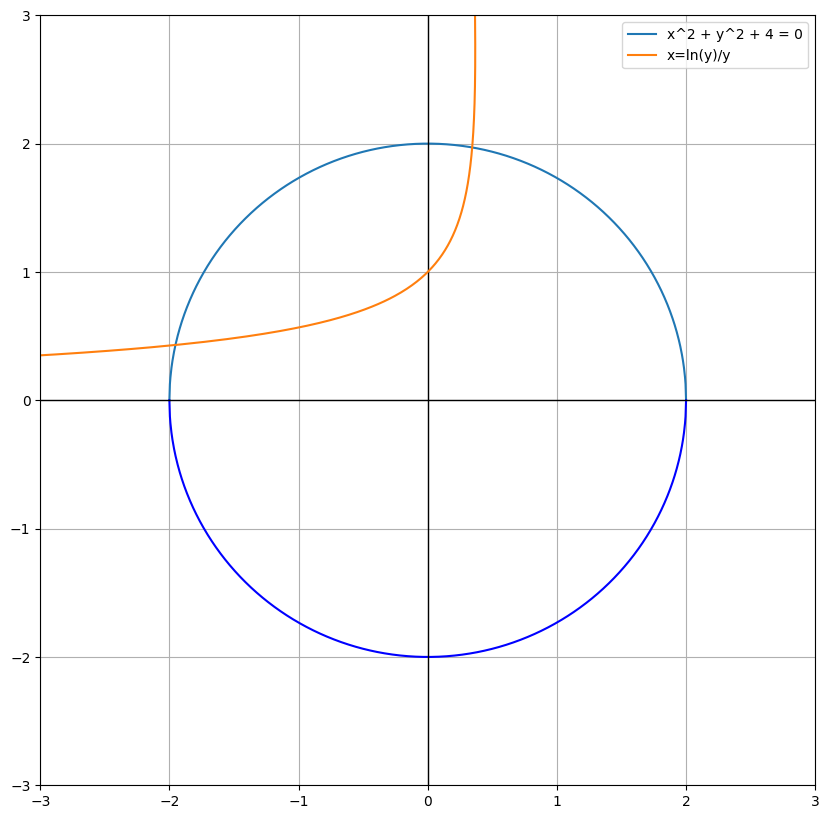

In [5]:
def draw_x_and_y(ax):
    draw_x(ax)
    draw_y(ax)
    ax.set_ylim((-3, 3))
    ax.set_xlim((-3, 3))
    ax.legend()


fig, ax = plt.subplots(figsize=(10, 10))
draw_x_and_y(ax)
plt.show()

In [6]:
def simple_iteration_solver(x0, y0):
    # iteration functions based on the given rearrangements:
    # Here we define:
    #   x = -sqrt(4 - y^2)
    #   y = exp(x * y)
    #
    # These functions can be adjusted if a different rearrangement is desired.
    fx = lambda y_val: -np.sqrt(4 - y_val**2)
    fy = lambda x_val, y_val: np.exp(x_val * y_val)
    
    iteration = 0
    x, y = x0, y0
    x_new = fx(y)
    y_new = fy(x, y)
    
    # Use max difference condition
    while max(abs(x_new - x), abs(y_new - y)) > e:
        plt.plot(x_new, y_new, 'ro', label=f'iter {iteration}: x={x_new:.3f}, y={y_new:.3f}')
        x, y = x_new, y_new
        x_new = fx(y)
        y_new = fy(x, y)
        iteration += 1
        
    plt.legend()
    return iteration, x_new, y_new

C:\Users\Самыел\AppData\Local\Temp\ipykernel_15980\1480509029.py:3: RuntimeWarning: divide by zero encountered in log
  x = lambda y0: np.log(y0)/y0


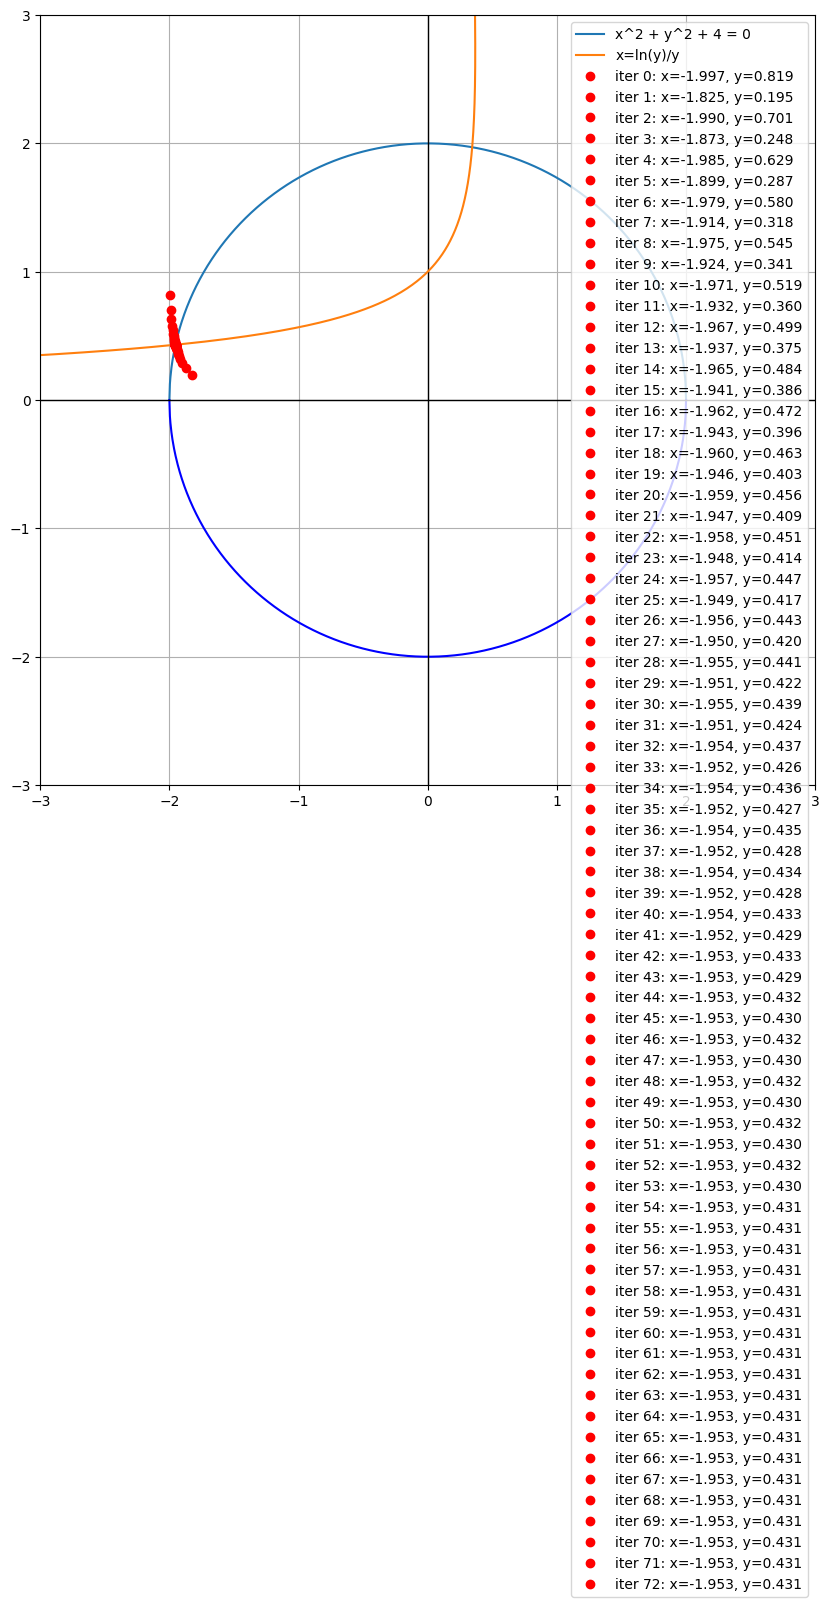

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
draw_x_and_y(ax)
simple_iteration_solver(-2, 0.1)
plt.show()

C:\Users\Самыел\AppData\Local\Temp\ipykernel_15980\1480509029.py:3: RuntimeWarning: divide by zero encountered in log
  x = lambda y0: np.log(y0)/y0


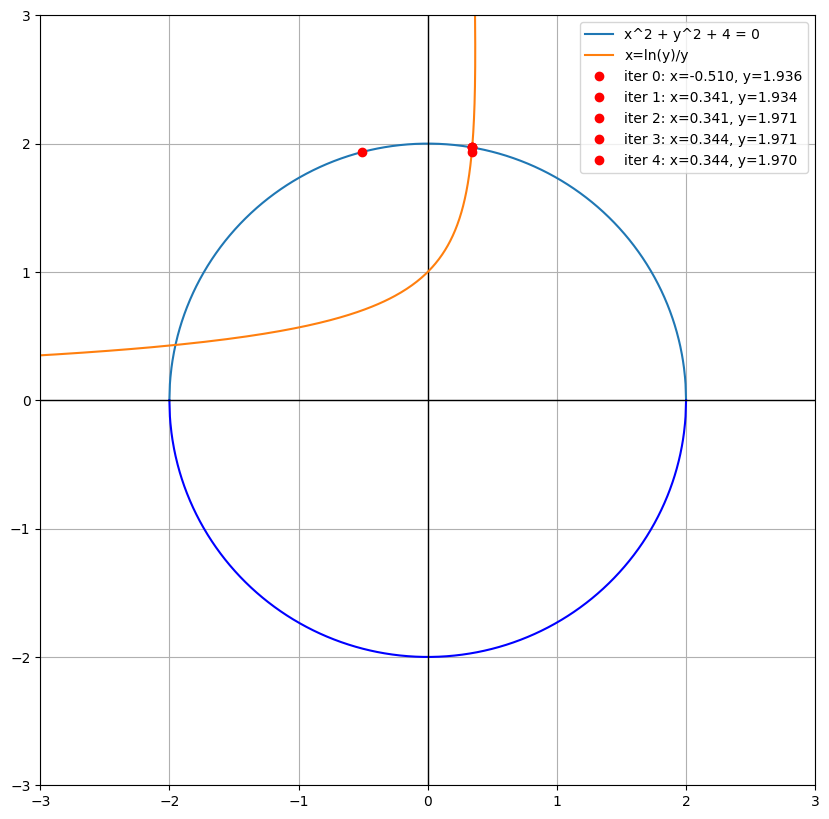

In [8]:
def simple_iteration_solver_right(x0, y0):
    # For the right branch: x = sqrt(4 - y^2)
    fx = lambda y_val: np.log(y_val)/y_val
    fy = lambda x_val: np.sqrt(4 - x_val**2)
    
    iteration = 0
    x, y = x0, y0
    x_new = fx(y)
    y_new = fy(x)
    
    while max(abs(x_new - x), abs(y_new - y)) > e:
        plt.plot(x_new, y_new, 'ro', label=f'iter {iteration}: x={x_new:.3f}, y={y_new:.3f}')
        x, y = x_new, y_new
        x_new = fx(y)
        y_new = fy(x)
        iteration += 1
        
    plt.legend()
    return iteration, x_new, y_new

# Example usage:
fig, ax = plt.subplots(figsize=(10, 10))
draw_x_and_y(ax)
simple_iteration_solver_right(0.5, 0.7)
plt.show()

In [9]:
f = lambda x, y: np.array(
    [
        x**2 + y**2 - 4,
        np.e**(x*y) - y
    ]
)

J = lambda x, y: np.array(
    [
        [
            2*x,
            2*y
        ],
        [
            y*np.e**(x*y),
            x*np.e**(x*y) - 1
        ]
    ]
)

In [10]:
def newton_method(x0):

    J_val = J(x0[0], x0[1])
    f_val = f(x0[0], x0[1])
    x1 = x0 - np.linalg.inv(J_val) @ f_val
    k = 1

    while abs(x0[0] - x1[0]) > e:

        x0 = x1
        plt.plot(x0[0], x0[1], 'ro', label=f'x{k}={x0[0]:.3f}, y{k}={x0[1]:.3f}')
        
        J_val = J(x0[0], x0[1])
        f_val = f(x0[0], x0[1])
        x1 = x0 - np.linalg.inv(J_val) @ f_val

        k += 1

    return k, x1


C:\Users\Самыел\AppData\Local\Temp\ipykernel_15980\1480509029.py:3: RuntimeWarning: divide by zero encountered in log
  x = lambda y0: np.log(y0)/y0


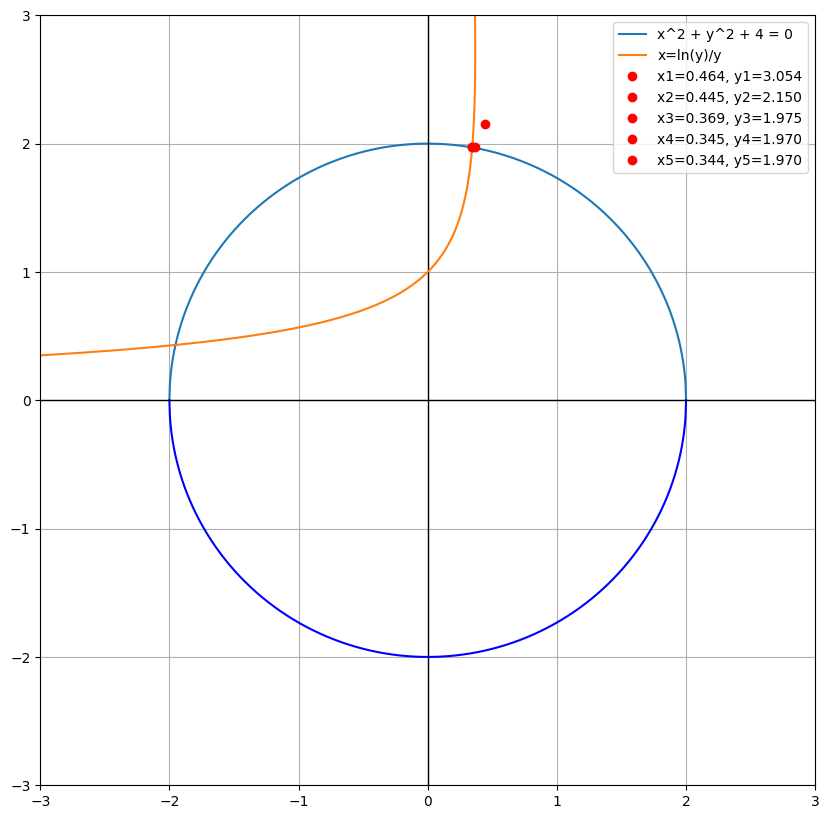

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
draw_x_and_y(ax)
newton_method([0.5, 0.7])
plt.legend()

C:\Users\Самыел\AppData\Local\Temp\ipykernel_15980\1480509029.py:3: RuntimeWarning: divide by zero encountered in log
  x = lambda y0: np.log(y0)/y0


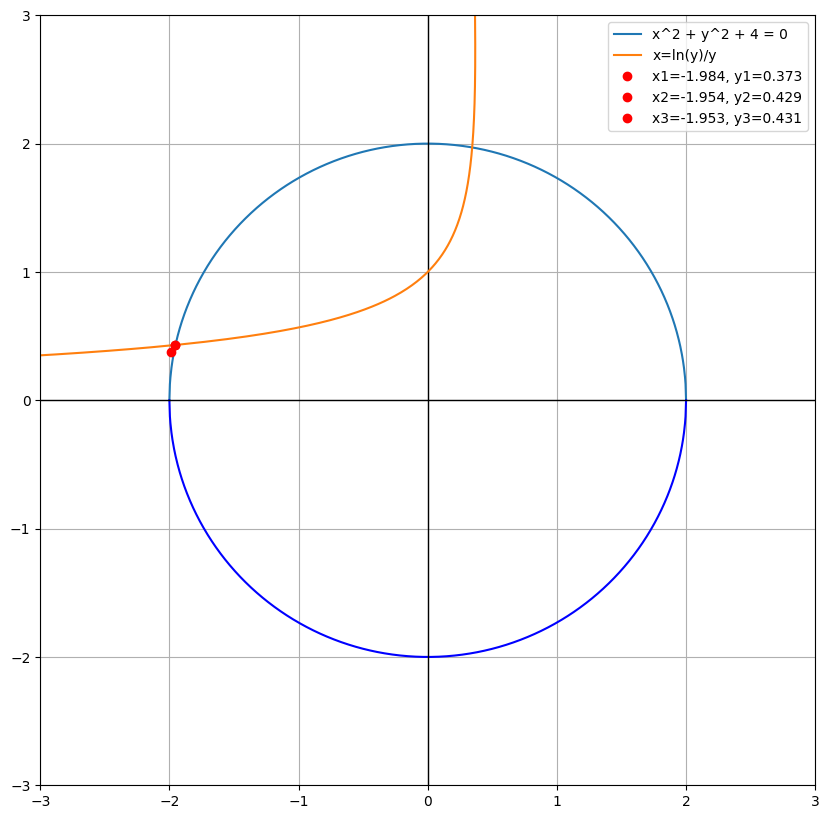

In [12]:
# Second root
fig, ax = plt.subplots(figsize=(10, 10))
draw_x_and_y(ax)
newton_method([-2, 0.1])
plt.legend()